# Questions and Hypothesis

How do the creatures’ medical diagnostics and earth-year age range differ based on each planet?
   - Because Boran and Radan are two completely different planets, the creatures on them will live two completely different lifestyles.
   - This will include different climates, different atmospheres, different societies, including governments/leadership, and different health conditions. This should be taken into account if this insurance wants to be implemented on other planets.


How do the non-human creatures’ medical diagnostics and earth-year age ranges on Boran and Radan differ compared to Earth’s human diagnostics and age range?
   - The range of data that PBHCICI is gathering from Bodan and Radan has to be somewhat familiar to the range of data values on Earth, for each column. If the data overall is out of their range of field, it would be quite difficult to implement and adapt the range of insurance to them because they would have to figure out what is normal and abnormal based on each respective planet, and not on Earth’s terms.
    
Will the dataset results of Boran and Radan be adaptable enough to be implemented on those planets?

**Hypothesis**: The results of the datasets on both Boran and Radan will differ greatly from each other and greatly from Earth.

# Attribute Definitions

**Boran, Radan**

   - Patient_id – The identifier of each non-human creature on the planet, denoted as a 4-5 digit number. It is the primary key of both the Boran table and Radan table.
   - Blood pressure – The patient’s blood pressure measurement
   - Exercise – measure of the amount of exercise a patient is getting
   - Weight – measure of the patient’s weight
   - Glucose – measure of the patient’s blood sugar
   - BMI – Body mass index, measure of the patients weight (in grams) divided by the patient’s height (in meters)
   - Planet_id – the identifying number for each of the planets. Boran is 1, Radan is 2.

**deidentify_list_cross_ref**

  - Patient_id - The identifier of each non-human creature on the planet, denoted as a 4-5 digit number. It is a foreign key that references the primary key patient_id in the Boran table and Radan table. 
  - Age – the creature’s age in earth-year life


In [2]:
# Importing pandas to read data and numpy to read values, and plt for graphing the scatter plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from IPython.display import display
pd.options.display.max_columns = 50
pd.option_context('display.max_rows', 8)

In [3]:
# Loading the planets table I exported from SQLite into Python

planet = pd.read_csv('C:/Users/afuam/Documents/Senior Year/Fall Semester/Principles of Data Science/Planets.csv')
planet.head()

,patient_id,age,blood_pressure,exercise,weight,glucose,bmi,planet_id
0,41989,76.957462,191.853108,102.544295,141.588777,119.807890,0.988849,1
1,8248,74.242965,189.628666,90.167716,139.689556,118.206986,0.972132,1
2,83944,86.055427,199.378675,143.205239,148.036310,125.230960,1.045336,1
3,89103,75.937458,197.254505,24.853721,148.179116,124.319127,1.023199,1
4,92701,59.481521,174.605957,57.130236,125.934950,107.102617,0.862161,1


In [13]:
# Filtering the data by planet using planet_id since I will be providing table and graphing results for each planet

boran = planet.query('planet_id == 1')
radan = planet.query('planet_id == 2')

# Attribute Descriptions

**Boran**

   - Patient_id – Unique categorical variable. 4-5 digit number.
   - Age - Numerical variable, range (59.5, 87.3)
   - Blood pressure – Numerical variable, range (168.0, 209.9)
   - Exercise – Numerical variable, range (5.1, 228.9), abnormally large range
   - Weight – Numerical variable, range (118.0, 160.6)
   - Glucose – Numerical variable, range (101.6, 133.9)
   - BMI – Numerical variable, range (0.81, 1.11)
   - Planet_id – Categorical variable. An integer that auto-increments.

**Radan**
   - Patient_id – Unique categorical variable. 4-5 digit number.
   - Age - Numerical variable, range (59.5, 87.3)
   - Blood pressure – Numerical variable, range (168.0, 209.9)
   - Exercise – Numerical variable, range (5.1, 228.9), abnormally large range
   - Weight – Numerical variable, range (118.0, 160.6)
   - Glucose – Numerical variable, range (101.6, 133.9)
   - BMI – Numerical variable, range (0.81, 1.11)
   - Planet_id – Categorical variable. An integer that auto-increments.


In [27]:
boran.describe()

,patient_id,age,blood_pressure,exercise,weight,glucose,bmi,planet_id
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,52421.300000,76.419431,193.632568,74.090198,143.812437,121.310649,1.000000,1.0
std,32425.383238,8.476798,10.744819,55.271606,10.642751,8.187990,0.076313,0.0
min,5231.000000,59.481521,168.038423,5.071321,118.051553,101.658343,0.819985,1.0
25%,19866.250000,70.286313,186.009547,28.702444,136.856140,115.683254,0.948012,1.0
50%,53724.500000,76.447460,195.145007,71.767815,145.439230,122.546964,1.009887,1.0
75%,83772.000000,84.757961,200.624363,97.071192,149.950593,126.364018,1.052331,1.0
max,94365.000000,87.262260,209.973069,228.903939,160.599282,133.964778,1.113857,1.0


planet_id
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

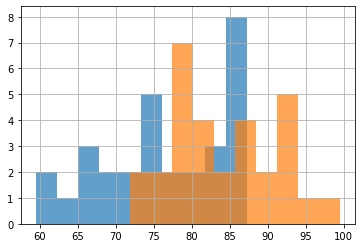

In [29]:
# Histogram for the earth-year life of planet Boran.

planet.groupby('planet_id').age.hist(alpha=0.7)

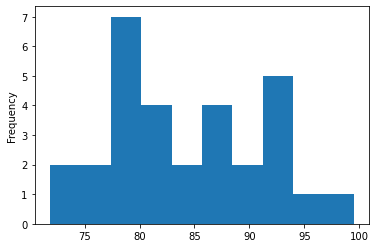

In [11]:
# Histogram for the earth-year life of planet Radan.

radan['age'].plot.hist()

In [9]:
# Describe table to show what the mean life expectancy is for Boran.

boran[['age']].describe()

,age
count,30.000000
mean,76.419431
std,8.476798
min,59.481521
25%,70.286313
50%,76.447460
75%,84.757961
max,87.262260


In [10]:
# Describe table to show what the mean life expectancy is for Boran.

radan[['age']].describe()

,age
count,30.000000
mean,84.217069
std,6.977068
min,71.826780
25%,79.630264
50%,82.166353
75%,89.186006
max,99.544450


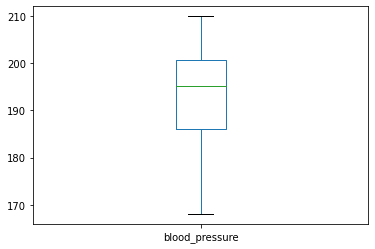

In [14]:
# Boxplot showing the blood pressure of Boran's data.

boran['blood_pressure'].plot.box()

In [17]:
boran[['blood_pressure']].describe()

,blood_pressure
count,30.000000
mean,193.632568
std,10.744819
min,168.038423
25%,186.009547
50%,195.145007
75%,200.624363
max,209.973069


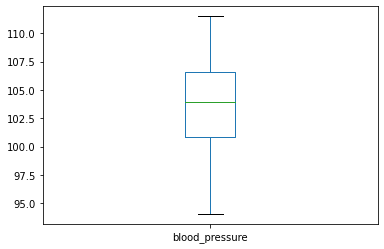

In [19]:
# Boxplot showing the blood pressure of Radan's data.

radan['blood_pressure'].plot.box()

In [18]:
radan[['blood_pressure']].describe()

,blood_pressure
count,30.000000
mean,103.482301
std,4.272000
min,94.041680
25%,100.863369
50%,103.956240
75%,106.606746
max,111.513411


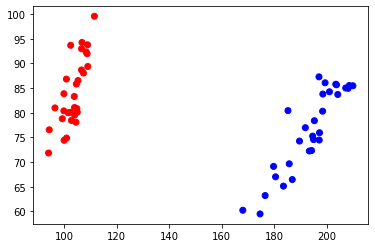

In [34]:
# Scatter plot showing the relationship between blood pressure and age between Boran (in blue) and Radan (in red).

fig, ax = plt.subplots()
colors = {1:'blue', 2:'red'}
ax.scatter(planet['blood_pressure'], planet['age'],  c=planet['planet_id'].map(colors))

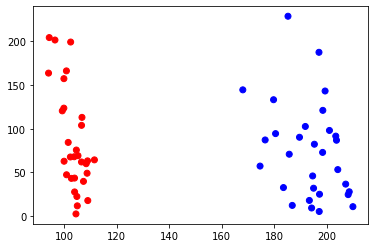

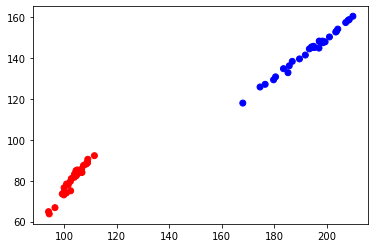

In [26]:
# Scatter plot showing the relationship between blood pressure and exercise between Boran (in blue) and Radan (in red).

fig, ax = plt.subplots()
colors = {1:'blue', 2:'red'}
ax.scatter(planet['blood_pressure'], planet['exercise'],  c=planet['planet_id'].map(colors))

fig, ax = plt.subplots()
colors = {1:'blue', 2:'red'}
ax.scatter(planet['blood_pressure'], planet['weight'],  c=planet['planet_id'].map(colors))

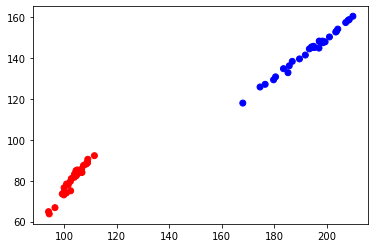

In [33]:
# Scatter plot showing the relationship between blood pressure and weight between Boran (in blue) and Radan (in red).

fig, ax = plt.subplots()
colors = {1:'blue', 2:'red'}
ax.scatter(planet['blood_pressure'], planet['weight'],  c=planet['planet_id'].map(colors))

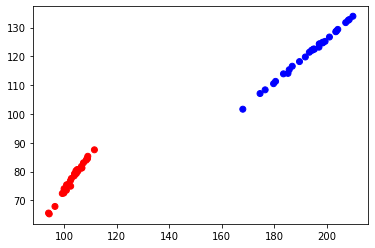

In [32]:
# Scatter plot showing the relationship between blood pressure and glucose between Boran (in blue) and Radan (in red).

fig, ax = plt.subplots()
colors = {1:'blue', 2:'red'}
ax.scatter(planet['blood_pressure'], planet['glucose'],  c=planet['planet_id'].map(colors))

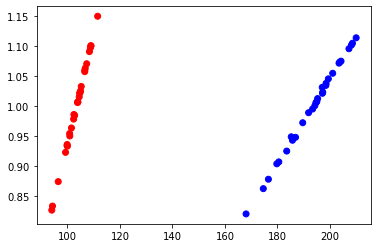

In [31]:
# Scatter plot showing the relationship between blood pressure and BMI between Boran (in blue) and Radan (in red).

fig, ax = plt.subplots()
colors = {1:'blue', 2:'red'}
ax.scatter(planet['blood_pressure'], planet['bmi'],  c=planet['planet_id'].map(colors))

# What to expect between weight and bmi

Usually in humans, a higher weight will usually positively correlate to a higher BMI. Grabbing from other scatterplots, 

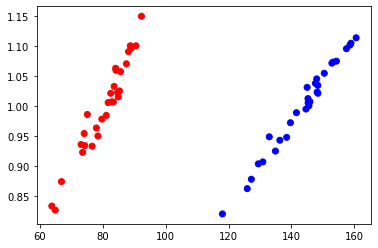

In [30]:
# This answers the what to expect

fig, ax = plt.subplots()
colors = {1:'blue', 2:'red'}
ax.scatter(planet['weight'], planet['bmi'],  c=planet['planet_id'].map(colors))